---
# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## For all outcome types

In [2]:
df = pd.read_csv('../data/combined-shelter-data.csv')
df.head()

,animal_id,outcome_time,date_of_birth,outcome_type,outcome_gender,outcome_age,intake_time,found_location,intake_type,intake_condition,animal_type,intake_gender,intake_age,breed,color,stay_duration,spay_neuter
0,A912055,2024-10-17 12:25:00,2023-10-25,Adoption,Neutered Male,11.0,2024-08-25 08:20:00,1800 Fairlawn Lane in Austin (TX),Stray,Injured,Cat,Intact Male,10.0,Domestic Shorthair,Brown Tabby/White,53,1
1,A915002,2024-10-17 12:21:00,2023-10-10,Return to Owner,Intact Male,12.0,2024-10-10 12:10:00,Austin (TX),Public Assist,Normal,Dog,Intact Male,12.0,German Shepherd Mix,Tan,7,0
2,A832172,2024-10-17 12:20:00,2021-01-24,Return to Owner,Neutered Male,36.0,2024-10-10 12:10:00,Austin (TX),Public Assist,Normal,Dog,Neutered Male,36.0,Pit Bull Mix,Brown/White,7,0
3,A915279,2024-10-17 12:00:00,2022-10-14,Transfer,Intact Female,24.0,2024-10-14 11:47:00,14514 Highsmith Street in Austin (TX),Stray,Normal,Cat,Intact Female,24.0,Domestic Shorthair,Black,3,0
4,A915162,2024-10-17 12:00:00,2022-10-12,Transfer,Unknown,24.0,2024-10-12 10:31:00,102 East Rundberg Lane in Austin (TX),Stray,Normal,Cat,Unknown,24.0,Domestic Shorthair,Brown Tabby,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140435 entries, 0 to 140434
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   animal_id         140435 non-null  object 
 1   outcome_time      140435 non-null  object 
 2   date_of_birth     140435 non-null  object 
 3   outcome_type      140435 non-null  object 
 4   outcome_gender    140435 non-null  object 
 5   outcome_age       140435 non-null  float64
 6   intake_time       140435 non-null  object 
 7   found_location    140435 non-null  object 
 8   intake_type       140435 non-null  object 
 9   intake_condition  140435 non-null  object 
 10  animal_type       140435 non-null  object 
 11  intake_gender     140435 non-null  object 
 12  intake_age        140435 non-null  float64
 13  breed             140435 non-null  object 
 14  color             140435 non-null  object 
 15  stay_duration     140435 non-null  int64  
 16  spay_neuter       14

In [4]:
df['outcome_time'] = pd.to_datetime(df['outcome_time'])
df['intake_time'] = pd.to_datetime(df['intake_time'])

In [5]:
df.describe()

,outcome_time,outcome_age,intake_time,intake_age,stay_duration,spay_neuter
count,140435,140435.000000,140435,140435.000000,140435.000000,140435.000000
mean,2018-10-23 01:57:21.978708736,23.828503,2018-10-01 11:04:04.304482304,23.263069,21.196276,0.429245
min,2013-10-01 01:00:00,0.000000,2013-10-01 01:12:00,0.000000,0.000000,0.000000
25%,2016-02-07 12:53:30,2.000000,2016-01-20 11:08:30,1.000000,2.000000,0.000000
50%,2018-07-31 06:05:00,12.000000,2018-07-09 04:59:00,12.000000,6.000000,0.000000
75%,2021-07-06 05:20:30,24.000000,2021-06-11 01:08:00,24.000000,21.000000,1.000000
max,2024-10-17 12:25:00,288.000000,2024-10-16 12:18:00,288.000000,1912.000000,1.000000
std,NaN,34.788219,NaN,34.674466,48.925846,0.494970


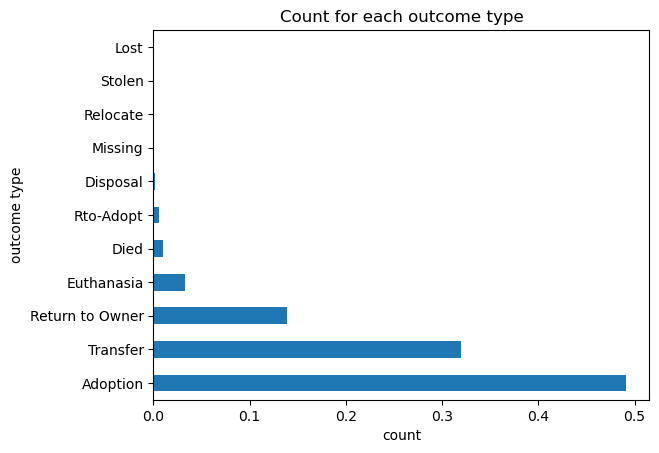

In [21]:
df['outcome_type'].value_counts(normalize=True).sort_values(ascending=False).plot(
    kind='barh', 
    title='Frequency for Each Outcome Type',
    xlabel='count',
    ylabel='outcome type');

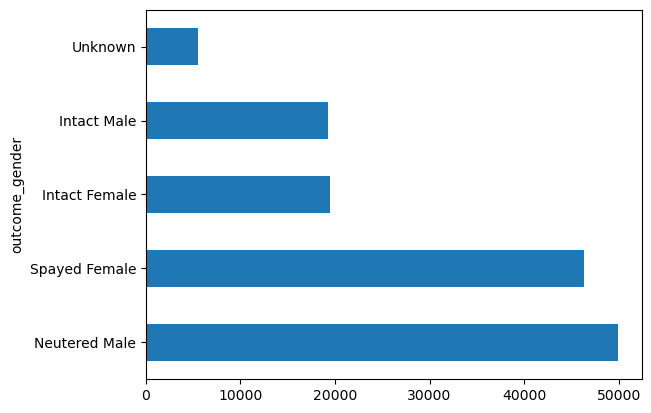

In [14]:
df['outcome_gender'].value_counts(ascending=False).plot(kind='barh');

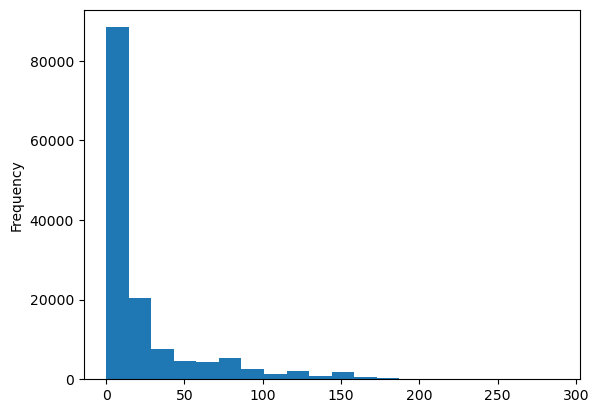

In [31]:
df['outcome_age'].plot(kind='hist', bins=20);

In [34]:
df['stay_duration'].value_counts()

stay_duration
0      22876
4      12220
3      10033
1       9862
5       7898
       ...  
686        1
836        1
691        1
700        1
542        1
Name: count, Length: 640, dtype: int64

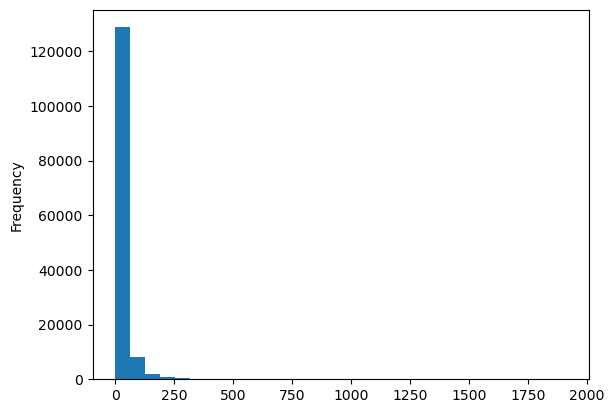

In [33]:
df['stay_duration'].plot(kind='hist', bins=30);

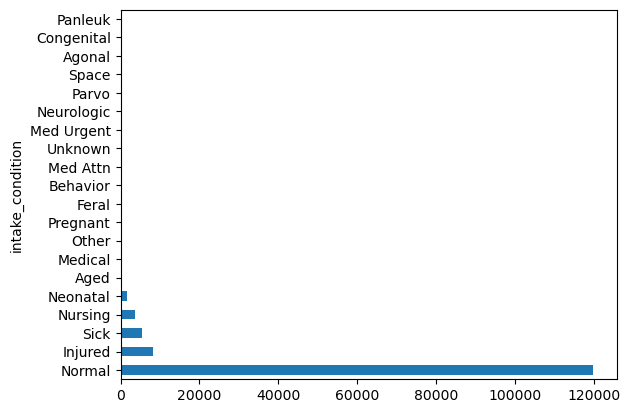

In [49]:
df['intake_condition'].value_counts().plot(kind='barh');

In [50]:
df['animal_type'].value_counts()

animal_type
Dog    77226
Cat    63209
Name: count, dtype: int64

---
## For Adoption

In [38]:
adoption = df[(df['outcome_type'] == 'Adoption') | (df['outcome_type']=='Return to Owner')].copy()
adoption.shape

(88431, 17)

In [39]:
adoption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88431 entries, 0 to 140431
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         88431 non-null  object        
 1   outcome_time      88431 non-null  datetime64[ns]
 2   date_of_birth     88431 non-null  object        
 3   outcome_type      88431 non-null  object        
 4   outcome_gender    88431 non-null  object        
 5   outcome_age       88431 non-null  float64       
 6   intake_time       88431 non-null  datetime64[ns]
 7   found_location    88431 non-null  object        
 8   intake_type       88431 non-null  object        
 9   intake_condition  88431 non-null  object        
 10  animal_type       88431 non-null  object        
 11  intake_gender     88431 non-null  object        
 12  intake_age        88431 non-null  float64       
 13  breed             88431 non-null  object        
 14  color             88431 no

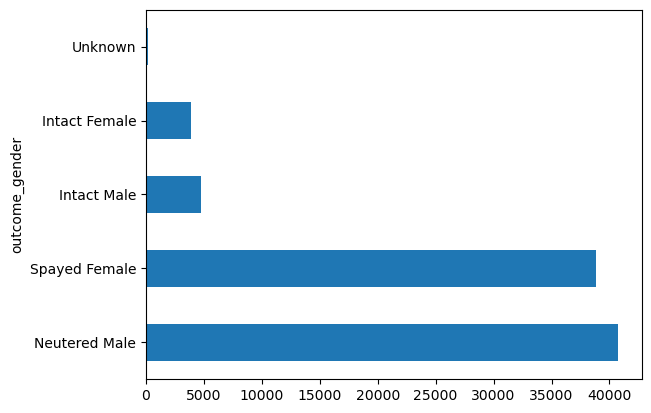

In [45]:
adoption['outcome_gender'].value_counts().plot(kind='barh');

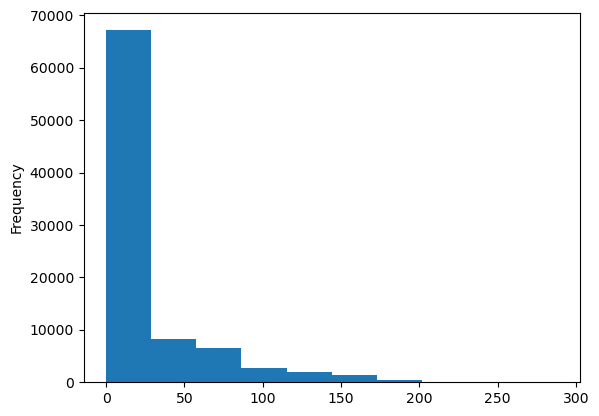

In [41]:
adoption['outcome_age'].plot(kind='hist');

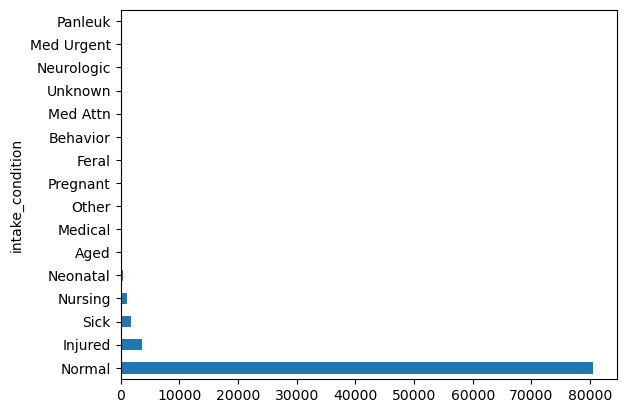

In [48]:
adoption['intake_condition'].value_counts().plot(kind='barh');

In [51]:
adoption['animal_type'].value_counts()

animal_type
Dog    54475
Cat    33956
Name: count, dtype: int64

In [52]:
adoption['spay_neuter'].value_counts()

spay_neuter
1    53013
0    35418
Name: count, dtype: int64